In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [5]:
df.shape

(569, 32)

#### Target feature is 'diagnosis'

In [6]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df = pd.get_dummies(df, drop_first = True)

In [8]:
corr = df.corr()
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


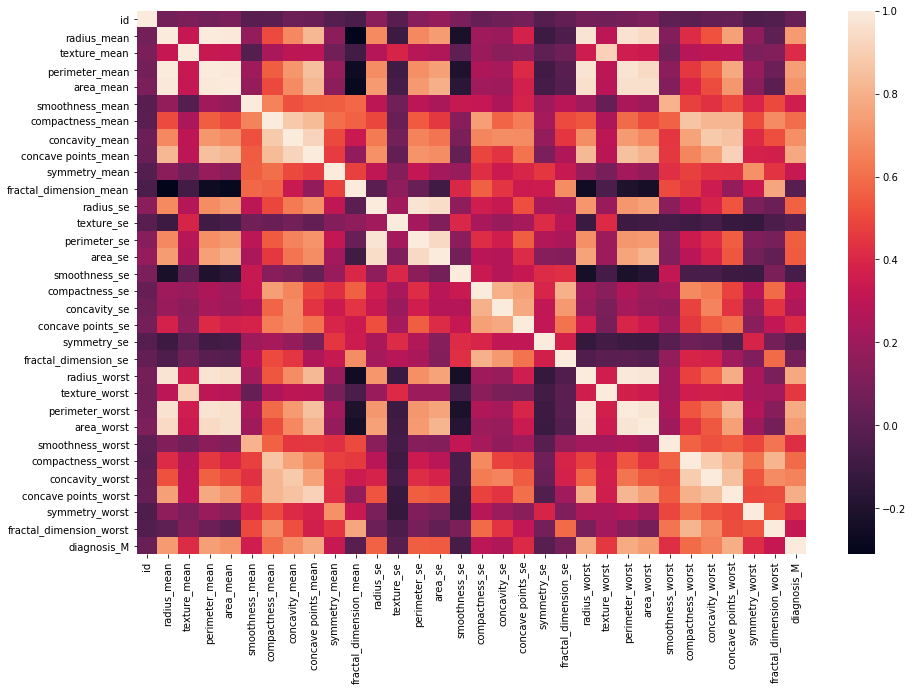

In [9]:
plt.figure(figsize = (15,10))
sns.heatmap(corr)

In [10]:
corr.iloc[1]

id                         0.074626
radius_mean                1.000000
texture_mean               0.323782
perimeter_mean             0.997855
area_mean                  0.987357
smoothness_mean            0.170581
compactness_mean           0.506124
concavity_mean             0.676764
concave points_mean        0.822529
symmetry_mean              0.147741
fractal_dimension_mean    -0.311631
radius_se                  0.679090
texture_se                -0.097317
perimeter_se               0.674172
area_se                    0.735864
smoothness_se             -0.222600
compactness_se             0.206000
concavity_se               0.194204
concave points_se          0.376169
symmetry_se               -0.104321
fractal_dimension_se      -0.042641
radius_worst               0.969539
texture_worst              0.297008
perimeter_worst            0.965137
area_worst                 0.941082
smoothness_worst           0.119616
compactness_worst          0.413463
concavity_worst            0

In [11]:
used_col = []
for i in corr:
    for j in corr:
        if i != j and (abs(corr[i][j]) > 0.8) and i not in used_col and j not in used_col:
            print('----' + i, '----' + j + '----', corr[i][j])
    used_col.append(i)

----radius_mean ----perimeter_mean---- 0.9978552814938113
----radius_mean ----area_mean---- 0.9873571700566119
----radius_mean ----concave points_mean---- 0.8225285223871791
----radius_mean ----radius_worst---- 0.9695389726112053
----radius_mean ----perimeter_worst---- 0.9651365139559878
----radius_mean ----area_worst---- 0.9410824595860459
----texture_mean ----texture_worst---- 0.9120445888404215
----perimeter_mean ----area_mean---- 0.9865068039913906
----perimeter_mean ----concave points_mean---- 0.8509770412528199
----perimeter_mean ----radius_worst---- 0.9694763634663142
----perimeter_mean ----perimeter_worst---- 0.9703868870426388
----perimeter_mean ----area_worst---- 0.9415498080023057
----area_mean ----concave points_mean---- 0.823268868652435
----area_mean ----area_se---- 0.8000859212343217
----area_mean ----radius_worst---- 0.9627460860470841
----area_mean ----perimeter_worst---- 0.959119574355266
----area_mean ----area_worst---- 0.9592133256499006
----smoothness_mean ----smoo

In [12]:
relevant_features = corr['diagnosis_M'].loc[corr['diagnosis_M'] > 0.5]
relevant_features

radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
diagnosis_M             1.000000
Name: diagnosis_M, dtype: float64

**Первый вариант выбора признаков** - отобрать признаки, имеющие корреляция с целевой переменной более 0,5. В то же время нужно учесть переменные, зависимые друг от друга. Одну из них нужно убрать (ту, у которой связь с целевой переменной слабее). Но нельзя забывать о линейно зависимых переменных, там, где корреляция больше 0,9. Их следует исключить.

**Второй вариант** - использовать древо решений, например Random Forest. Там предусмотрен метод, позволяющий обозначить значимость переменных.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop('diagnosis_M', axis = 1)
y = df['diagnosis_M']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = RandomForestClassifier()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)


model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
model.feature_importances_

array([0.00670954, 0.03346122, 0.01501805, 0.04888829, 0.04000197,
       0.00524744, 0.00780046, 0.06327137, 0.12104073, 0.00346834,
       0.00272949, 0.02141957, 0.0050162 , 0.02142942, 0.05987452,
       0.00528438, 0.00273093, 0.00921916, 0.00255838, 0.00445844,
       0.0049105 , 0.11363652, 0.02016718, 0.14408227, 0.08668967,
       0.01122574, 0.01014744, 0.01400865, 0.10419076, 0.0070807 ,
       0.00423266])

In [26]:
importances = list(zip(model.feature_importances_, df.columns))
importances.sort(reverse = True)
importances

[(0.14408227142822333, 'perimeter_worst'),
 (0.12104072514369653, 'concave points_mean'),
 (0.11363651965284248, 'radius_worst'),
 (0.10419075525450586, 'concave points_worst'),
 (0.08668966510368581, 'area_worst'),
 (0.06327136671991704, 'concavity_mean'),
 (0.059874524498599146, 'area_se'),
 (0.048888294747585756, 'perimeter_mean'),
 (0.04000197390204102, 'area_mean'),
 (0.03346121787020183, 'radius_mean'),
 (0.021429420279787576, 'perimeter_se'),
 (0.021419570328017425, 'radius_se'),
 (0.020167182815036724, 'texture_worst'),
 (0.015018054472993274, 'texture_mean'),
 (0.014008651304832158, 'concavity_worst'),
 (0.01122574087492825, 'smoothness_worst'),
 (0.010147444637938685, 'compactness_worst'),
 (0.009219164639279978, 'concavity_se'),
 (0.007800460784485506, 'compactness_mean'),
 (0.007080698007238187, 'symmetry_worst'),
 (0.006709539686044088, 'id'),
 (0.00528438127541685, 'smoothness_se'),
 (0.005247435070787272, 'smoothness_mean'),
 (0.005016203946701163, 'texture_se'),
 (0.004